# Import Statements

In [34]:
from dask import dataframe as dd
import time
import numpy as np
import pandas as pd
from pandas import *
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
sns.set_style("whitegrid")
import matplotlib.image as mpimg

# Need to check Dask( temporary on hold)

In [35]:
"""start = time.time()
Census = dd.read_csv('Census.csv')
end = time.time()
print("Read csv with dask: ",(end-start),"sec")
Census.head()"""

'start = time.time()\nCensus = dd.read_csv(\'Census.csv\')\nend = time.time()\nprint("Read csv with dask: ",(end-start),"sec")\nCensus.head()'

In [36]:
"""start = time.time()
Crimes= dd.read_csv('Crimes.csv')
end = time.time()
print("Read csv with dask: ",(end-start),"sec")
Crimes.head()"""

'start = time.time()\nCrimes= dd.read_csv(\'Crimes.csv\')\nend = time.time()\nprint("Read csv with dask: ",(end-start),"sec")\nCrimes.head()'

# Preliminary Data Processing

### 1.Understanding the shape of data 

In [37]:
start = time.time()
Crimes=pd.read_csv('Crimes.csv', engine = 'c')
end = time.time()
print("Read csv with pandas: ",(end-start),"sec")
Crimes.shape


Read csv with pandas:  27.66176199913025 sec


(7299208, 22)

In [38]:
start = time.time()
Census=pd.read_csv('Census.csv', engine = 'c')
end = time.time()
print("Read csv with pandas: ",(end-start),"sec")
Census.shape


Read csv with pandas:  0.01881694793701172 sec


(78, 9)

### 2. Understanding various data types

In [39]:
Crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7299208 entries, 0 to 7299207
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [40]:
Census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Community Area Number                         77 non-null     float64
 1   COMMUNITY AREA NAME                           78 non-null     object 
 2   PERCENT OF HOUSING CROWDED                    78 non-null     float64
 3   PERCENT HOUSEHOLDS BELOW POVERTY              78 non-null     float64
 4   PERCENT AGED 16+ UNEMPLOYED                   78 non-null     float64
 5   PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  78 non-null     float64
 6   PERCENT AGED UNDER 18 OR OVER 64              78 non-null     float64
 7   PER CAPITA INCOME                             78 non-null     int64  
 8   HARDSHIP INDEX                                77 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ KB


In [41]:
Census.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [42]:
Crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


# Data Quality Issues

### 1.Create a copy of orginal data

In [43]:
Crimes_copy=Crimes.copy()

In [44]:
Census_copy=Census.copy()

### 2. Removing Duplicate columns of Longitude and Latitude as separate Location column is present

In [45]:
Crimes_copy.drop(['Latitude','Longitude'],axis=1,inplace=True)
Crimes_copy.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,"(41.881903443, -87.755121152)"


### 3.Replacing spaces in the column headers for easy of access

In [46]:
Crimes_copy.columns = Crimes_copy.columns.str.replace(' ', '')
CrimeCols=Crimes_copy.columns
Crimes_copy.head()

,ID,CaseNumber,Date,Block,IUCR,PrimaryType,Description,LocationDescription,Arrest,Domestic,Beat,District,Ward,CommunityArea,FBICode,XCoordinate,YCoordinate,Year,UpdatedOn,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,"(41.881903443, -87.755121152)"


### 4.Checking for missing values in the data 

0          False
1          False
2           True
3          False
4          False
           ...  
7299203    False
7299204    False
7299205    False
7299206    False
7299207    False
Length: 7299208, dtype: bool

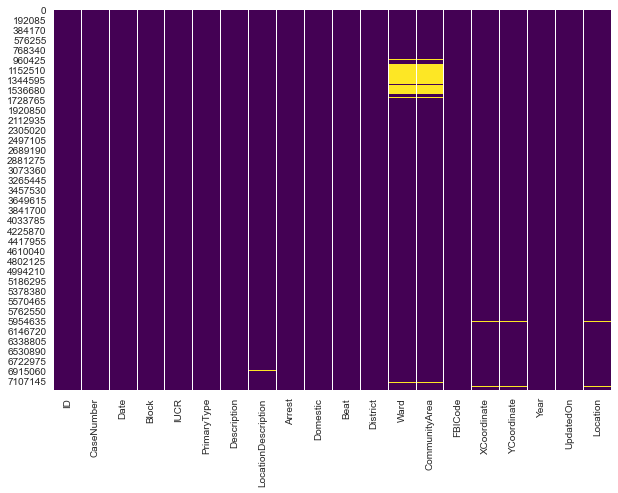

In [47]:
plt.figure(figsize=(10,7))
sns.color_palette("magma", as_cmap=True)
sns.heatmap(Crimes_copy.isnull(), cbar = False,cmap="viridis")
plt.savefig("missing.png")
pd.isnull(Crimes_copy).any(axis=1)

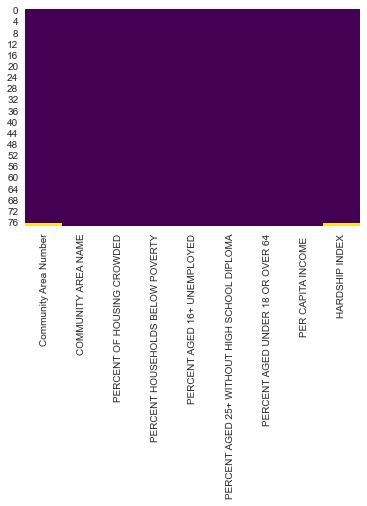

In [48]:
sns.heatmap(Census_copy.isnull(), cbar = False,cmap="viridis")
plt.savefig("missing2.png")

### 5. Removing missing values from the dataset

0          False
1          False
3          False
4          False
5          False
           ...  
7299203    False
7299204    False
7299205    False
7299206    False
7299207    False
Length: 6615222, dtype: bool

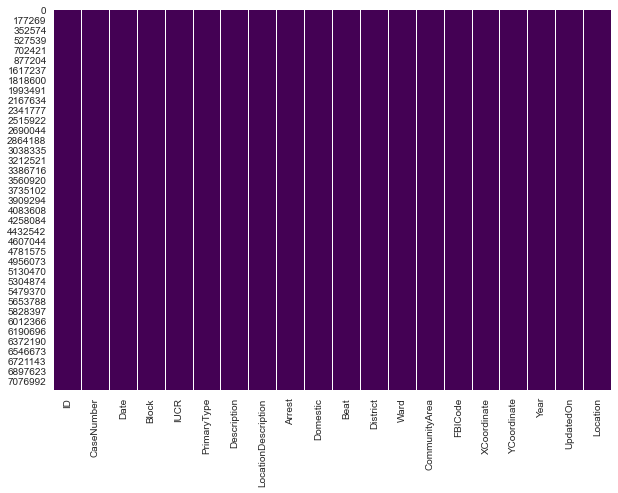

In [49]:
Crimes_copy=Crimes_copy.dropna()
plt.figure(figsize=(10,7))
sns.color_palette("magma", as_cmap=True)
sns.heatmap(Crimes_copy.isnull(), cbar = False,cmap="viridis")
pd.isnull(Crimes_copy).any(axis=1)

<AxesSubplot:>

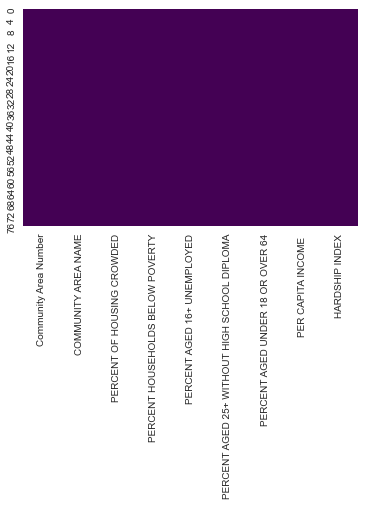

In [50]:
Census_copy=Census_copy.dropna()
sns.heatmap(Census_copy.isnull(), cbar = False,cmap="viridis")

### 6.Conversion of Date Time to python's DateTime format

In [51]:
Crimes_copy.Date=pd.to_datetime(Crimes_copy.Date,format='%m/%d/%Y %I:%M:%S %p')
Crimes_copy.index = pd.DatetimeIndex(Crimes_copy.Date)

# Exploratory Data Analysis and their Visualisations

## Investigating Questions

###  1. Which locations do the crimes mostly occur ?

<AxesSubplot:xlabel='count', ylabel='LocationDescription'>

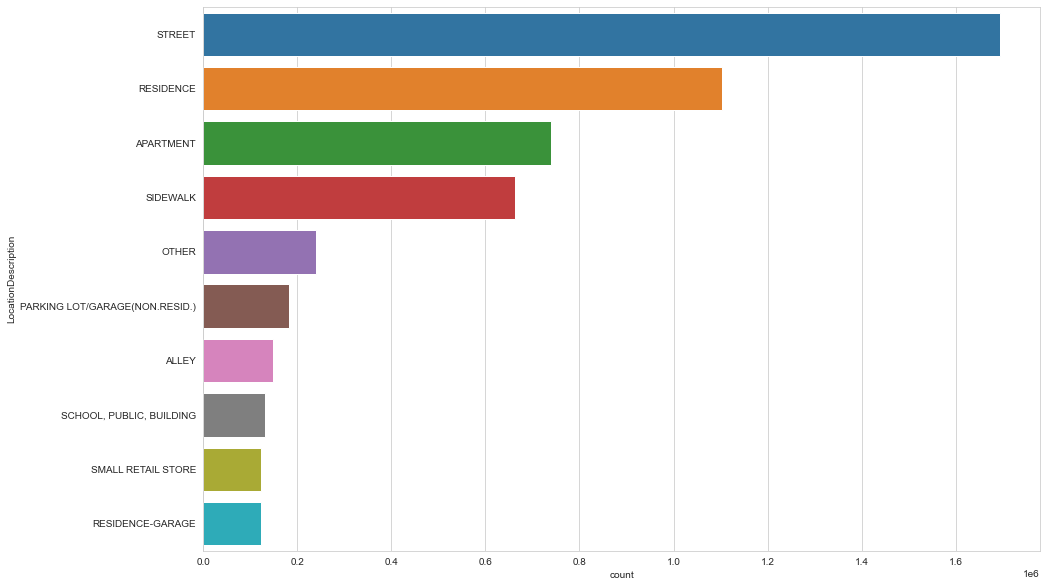

In [52]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'LocationDescription', data = Crimes_copy, order = Crimes_copy['LocationDescription'].value_counts().iloc[:10].index)

### 3. Which crimes happen the most ?

<AxesSubplot:xlabel='count', ylabel='PrimaryType'>

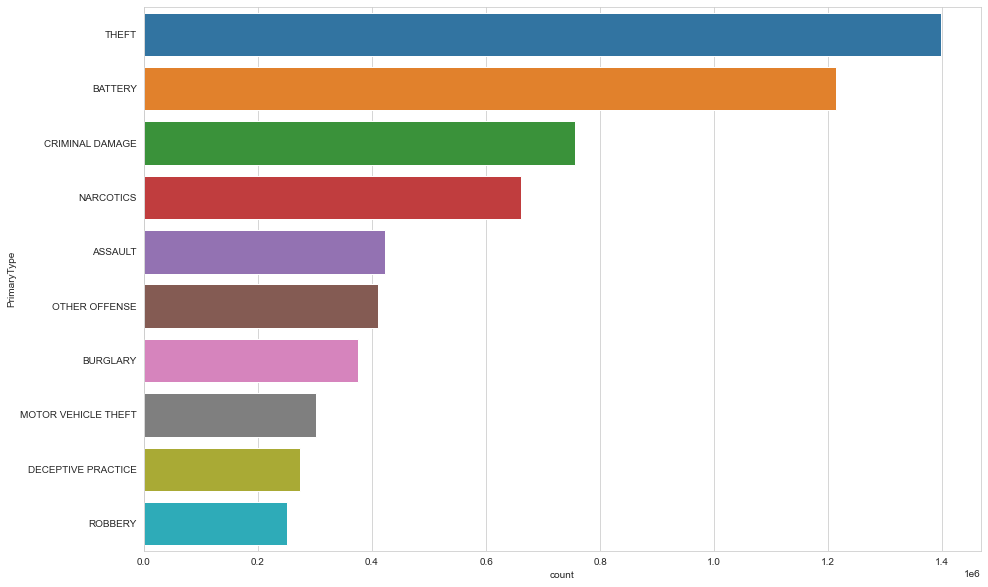

In [63]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'PrimaryType', data = Crimes_copy, order = Crimes_copy['PrimaryType'].value_counts().iloc[:10].index)

### 4. What is the trend of the crimes happening along the years?

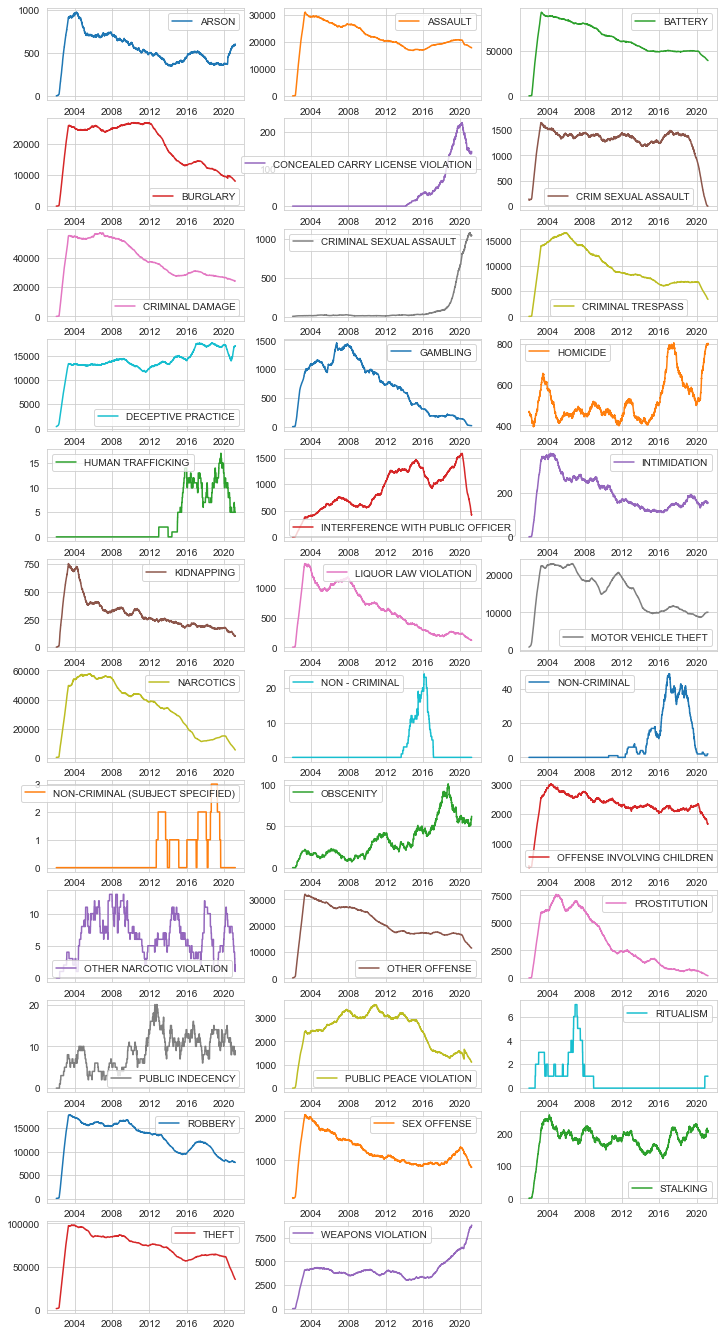

In [65]:
crime_data_for_trend = Crimes_copy.pivot_table('ID', aggfunc=np.size, columns='PrimaryType', index=Crimes_copy.index.date, fill_value=0)
crime_data_for_trend.index = pd.DatetimeIndex(crime_data_for_trend.index)
plot = crime_data_for_trend.rolling(365).sum().plot(figsize=(12, 24), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

## The pattern of crimes

### 1.Trend of Crimes occurring over the years

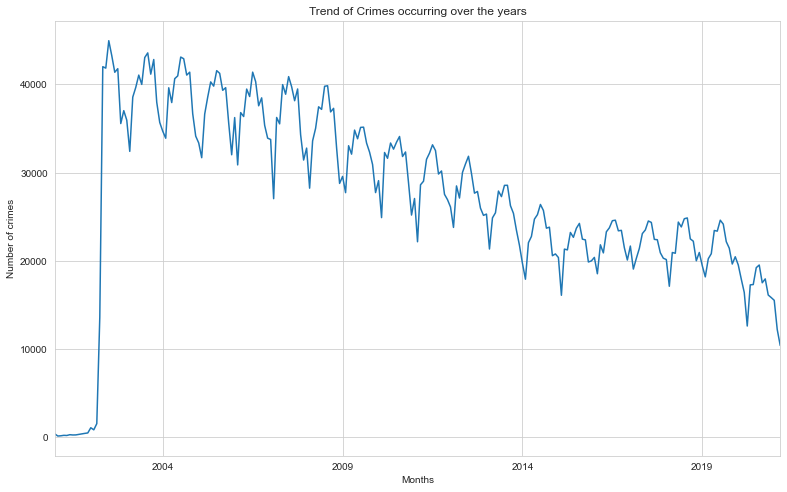

In [66]:
plt.figure(figsize=(13,8))
Crimes_copy.resample('M').size().plot(legend=False)
plt.title('Trend of Crimes occurring over the years')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

### 2. Crimes happening monthwise

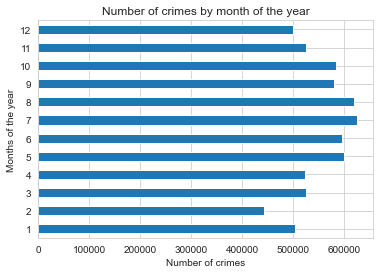

In [68]:
Crimes_copy.groupby([Crimes_copy.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

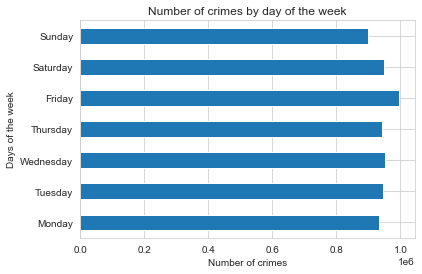

In [57]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
Crimes_copy.groupby([Crimes_copy.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

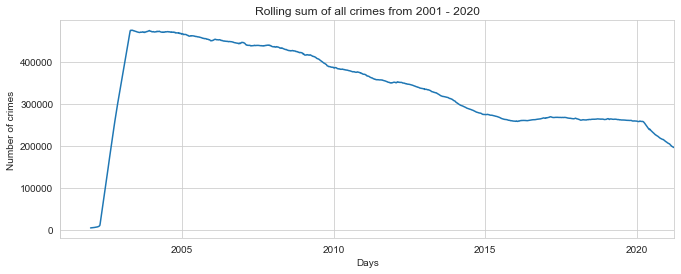

In [58]:
plt.figure(figsize=(11,4))
Crimes_copy.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2001 - 2020')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


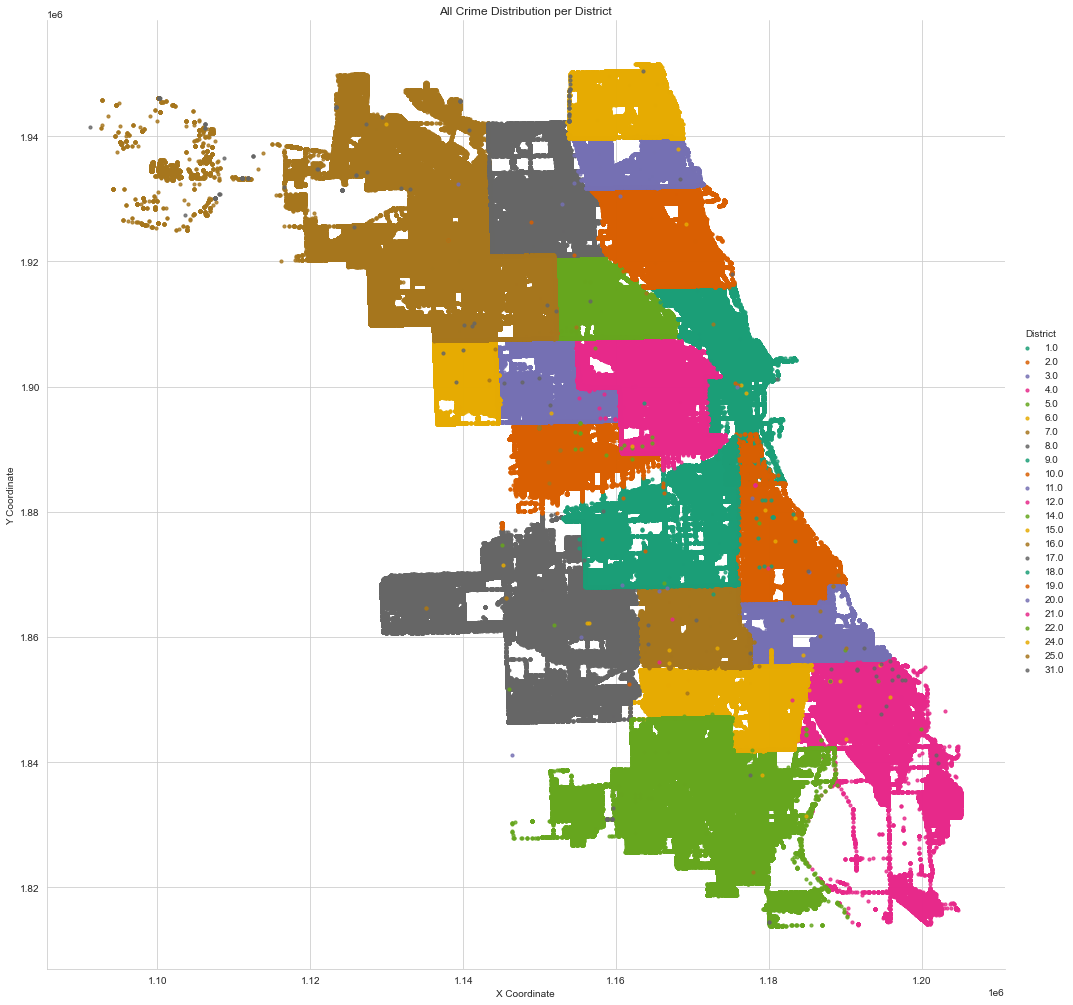

In [62]:
Crimes = Crimes.loc[(Crimes['X Coordinate']!=0)]
sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=Crimes[:],
           fit_reg=False, 
           hue="District",
           palette='Dark2',
           size=14,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("All Crime Distribution per District")
plt.savefig("incorrectdistrict.png")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


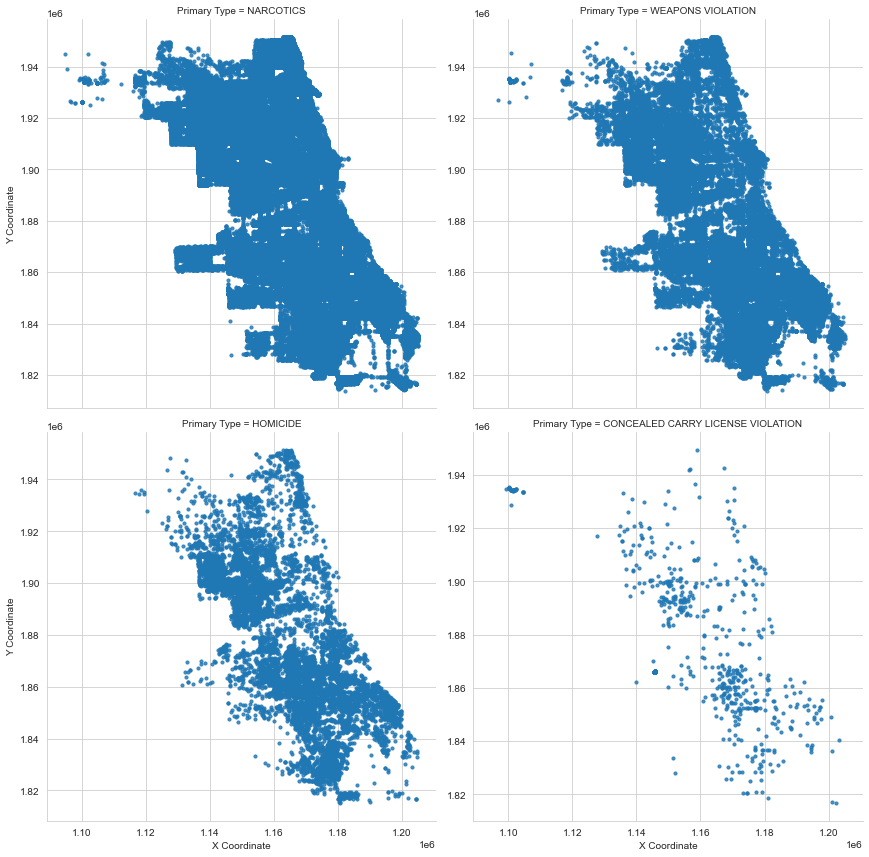

In [60]:
col2 = ['Date','Primary Type','Arrest','Domestic','District','X Coordinate','Y Coordinate']
multiple_crimes = Crimes[col2]
multiple_crimes = multiple_crimes[multiple_crimes['Primary Type']\
                  .isin(['HOMICIDE','CONCEALED CARRY LICENSE VIOLATION','NARCOTICS','WEAPONS VIOLATION'])]
# clean some rouge (0,0) coordinates
multiple_crimes = multiple_crimes[multiple_crimes['X Coordinate']!=0]
multiple_crimes.head()
g = sns.lmplot(x="X Coordinate",
               y="Y Coordinate",
               col="Primary Type",
               data=multiple_crimes.dropna(), 
               col_wrap=2, size=6, fit_reg=False, 
               sharey=False,
               scatter_kws={"marker": "D",
                            "s": 10})

<AxesSubplot:xlabel='Counts', ylabel='Description'>

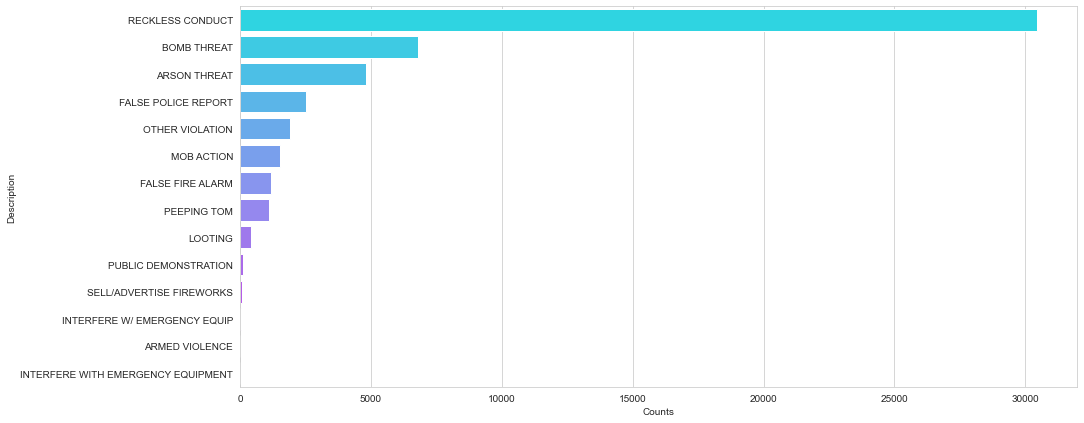

In [61]:
df_public_peace =  Crimes[Crimes['Primary Type'] == 'PUBLIC PEACE VIOLATION']
df_public_data = pd.DataFrame({"Counts": df_public_peace['Description'].value_counts(), "Description" : df_public_peace['Description'].value_counts().index})
df_public_data.reset_index(inplace=True)
df_public_data = df_public_data.drop(columns=['index'], axis = 1)
df_public_data.head()
plt.figure(figsize = (15, 7))
sns.barplot(y ="Description", x = "Counts", data = df_public_data, palette="cool")